In [ ]:
import pandas as pd
import plotly.express as px
from fbprophet import Prophet

In [ ]:
#initialize plotly
import plotly.io as pio
pio.renderers.default='colab'

Import data set and explore it

In [ ]:
df=pd.read_csv('TSLA.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       399 non-null    object 
 1   Open       399 non-null    float64
 2   High       399 non-null    float64
 3   Low        399 non-null    float64
 4   Close      399 non-null    float64
 5   Adj Close  399 non-null    float64
 6   Volume     399 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 21.9+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,184.794493,188.810811,180.420469,184.866839,184.866839,4.444053e+07
std,229.177274,234.046746,223.605970,229.171399,229.171399,3.032915e+07
min,36.220001,36.945999,35.397999,35.793999,35.793999,8.297500e+06
25%,55.309001,56.008000,54.091501,55.221002,55.221002,2.478255e+07
50%,66.875000,68.125000,65.500000,66.847000,66.847000,3.498150e+07
75%,168.190006,171.830002,162.956497,166.448498,166.448498,5.211238e+07
max,891.380005,900.400024,871.599976,883.090027,883.090027,3.046940e+08


Data Visualization 

In [ ]:
px.area(df,x="Date",y="Close")

In [ ]:
px.line(df,x="Date",y="Close")

In [ ]:
px.area(df,x="Date",y="Volume")

In [ ]:
px.bar(df,y='Volume')

In [ ]:
px.box(df,y="Close")

Facebook prophet is free library it is accurate and fast, reliable , fully automatic, domain knowledge integration, available in r and python


In [ ]:
#data Prepration
# we will use date and close price
column=['Date','Close']
ndf=pd.DataFrame(df,columns=column)

In [ ]:
ndf

,Date,Close
0,2016-08-19,45.000000
1,2016-08-22,44.585999
2,2016-08-23,44.967999
3,2016-08-24,44.523998
4,2016-08-25,44.192001
...,...,...
1253,2021-08-12,722.250000
1254,2021-08-13,717.169983
1255,2021-08-16,686.169983
1256,2021-08-17,665.710022


In [ ]:
prophet_df=ndf.rename(columns={'Date':'ds','Close':'y'})

In [ ]:
prophet_df

,ds,y
0,2016-08-19,45.000000
1,2016-08-22,44.585999
2,2016-08-23,44.967999
3,2016-08-24,44.523998
4,2016-08-25,44.192001
...,...,...
1253,2021-08-12,722.250000
1254,2021-08-13,717.169983
1255,2021-08-16,686.169983
1256,2021-08-17,665.710022


Creating facebook prophet model

In [ ]:
m=Prophet()
m.fit(prophet_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Forcasting

In [ ]:
future=m.make_future_dataframe(periods=30)
forecast=m.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-08-19,24.378020,-52.568744,64.537222,24.378020,24.378020,-16.665260,-16.665260,-16.665260,-4.982250,-4.982250,-4.982250,-11.683010,-11.683010,-11.683010,0.0,0.0,0.0,7.712760
1,2016-08-22,24.875917,-44.633665,77.666720,24.875917,24.875917,-8.797902,-8.797902,-8.797902,-3.075851,-3.075851,-3.075851,-5.722051,-5.722051,-5.722051,0.0,0.0,0.0,16.078015
2,2016-08-23,25.041883,-41.800044,81.326204,25.041883,25.041883,-7.819292,-7.819292,-7.819292,-3.831106,-3.831106,-3.831106,-3.988186,-3.988186,-3.988186,0.0,0.0,0.0,17.222591
3,2016-08-24,25.207848,-40.700491,75.167483,25.207848,25.207848,-6.702836,-6.702836,-6.702836,-4.297679,-4.297679,-4.297679,-2.405158,-2.405158,-2.405158,0.0,0.0,0.0,18.505012
4,2016-08-25,25.373814,-40.766969,78.616486,25.373814,25.373814,-5.301639,-5.301639,-5.301639,-4.318203,-4.318203,-4.318203,-0.983436,-0.983436,-0.983436,0.0,0.0,0.0,20.072175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283,2021-09-13,839.982063,778.524213,899.336554,839.313166,840.387238,-3.610334,-3.610334,-3.610334,-3.075851,-3.075851,-3.075851,-0.534484,-0.534484,-0.534484,0.0,0.0,0.0,836.371729
1284,2021-09-14,841.097673,773.326058,895.908778,840.338066,841.581614,-4.991474,-4.991474,-4.991474,-3.831106,-3.831106,-3.831106,-1.160368,-1.160368,-1.160368,0.0,0.0,0.0,836.106199
1285,2021-09-15,842.213282,777.872934,896.387547,841.390295,842.770130,-6.062528,-6.062528,-6.062528,-4.297679,-4.297679,-4.297679,-1.764850,-1.764850,-1.764850,0.0,0.0,0.0,836.150754
1286,2021-09-16,843.328892,775.540332,897.104021,842.381839,843.933325,-6.657458,-6.657458,-6.657458,-4.318203,-4.318203,-4.318203,-2.339255,-2.339255,-2.339255,0.0,0.0,0.0,836.671434


In [ ]:
px.line(forecast,x='ds',y='yhat')

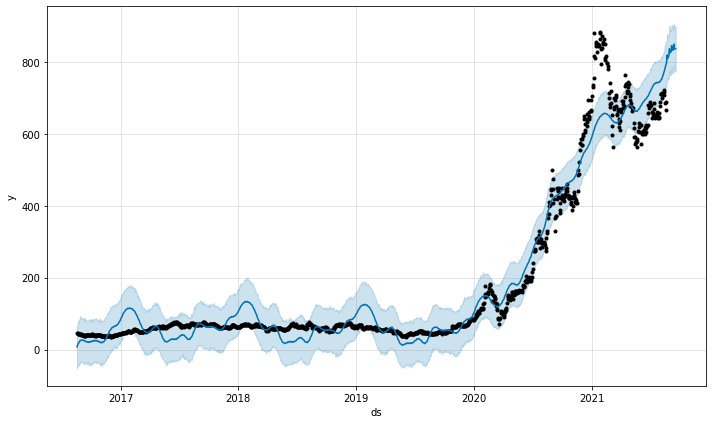

In [ ]:
figure=m.plot(forecast,xlabel='ds',ylabel='y')

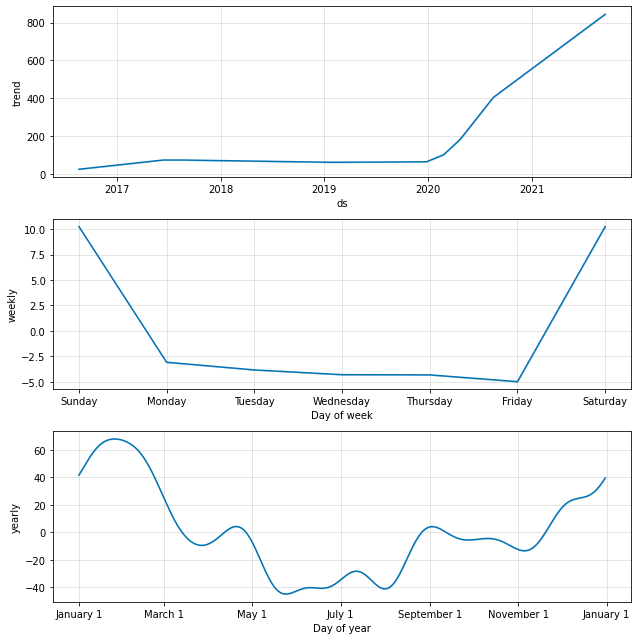

In [ ]:
figure2=m.plot_components(forecast)

In [ ]:
#download the forecast
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>